In [1]:
library(tidyverse)
library(ape)
library(microbiome)
library(ggthemes)     # additional themes fro ggplot2
library(ggpubr)
library(vegan)
library(repr)
library(ggpmisc)      # to use stat_poly_eq
library(RColorBrewer) # nice color options
library(gridExtra)    # gridding plots
library(viridis)
library(ggrepel)
#library(wesanderson) #new palettes http://www.sthda.com/english/wiki/ggplot2-colors-how-to-change-colors-automatically-and-manually
library(rioja)        # plotting poackages for tabular bubbleplots
library(reshape2) 
library(dada2)
library(DECIPHER)
#library(ggtern)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where


Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform



Attaching package: ‘ggpubr’




In [10]:
options(repr.plot.width=12, repr.plot.height=8)
set.seed(10000)

theme_glab <- function(base_size = 20,
                    base_family = "",
                    base_line_size = base_size / 180,
                    base_rect_size = base_size / 180) {
   
    font <- "Helvetica" #assign font family up front
   
    theme_bw(base_size = base_size,
                base_family = base_family,
                base_line_size = base_line_size) %+replace%
    theme(
        legend.background =  element_blank(),
        legend.title =       element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65),
                                         hjust = 0),
        legend.text =        element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65)),
        legend.key.size =    unit(0.8, "lines"),
     
      plot.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        hjust = 0),
       
      axis.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
      axis.text = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
       
      plot.caption = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.7),
        hjust = 1),
       
      panel.grid.major = element_blank(),  
      panel.grid.minor = element_blank(),  
      panel.border = element_rect(fill = NA, colour = rgb(100, 100, 100, maxColorValue = 255)),

     
      complete = TRUE
    )
}


In [3]:
CAs_otu_raw <- read.csv("dataset_CoEvolve/Coevolve_distribution_BETAPROK.csv", sep="\t", header=TRUE)

CAs_otu_raw

Expedition,hmm,CA_class,Total.coverage,Normalized_total_coverage,Sample
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
arg19,Beta_CA_arch,Beta,40.3404,1.4006414,AG11
arg19,Beta_CA_prok,Beta,62.6709,2.1759689,AG11
arg19,Beta_CA_arch,Beta,318.5506,14.9013800,AG13
arg19,Beta_CA_prok,Beta,121.6530,5.6907681,AG13
arg19,Beta_CA_arch,Beta,281.1557,32.6241870,AG15
arg19,Beta_CA_prok,Beta,55.5991,6.4514980,AG15
arg19,Beta_CA_arch,Beta,29.3973,3.1516099,AG17
arg19,Beta_CA_prok,Beta,29.3973,3.1516099,AG17
arg19,Beta_CA_arch,Beta,58.1551,1.4622546,AG19


## OTU_table

In [4]:
subset1 <- as.data.frame(CAs_otu_raw[, c("hmm", "Normalized_total_coverage", "Sample")])
subset2 <- subset1[!duplicated(subset1),]
otu_table <- as.data.frame(subset2 %>% pivot_wider(names_from = Sample, 
                                                   values_from = Normalized_total_coverage, 
                                                   values_fill = list(Value = 0)))
row.names(otu_table) <- otu_table$hmm
otu_table$hmm <- NULL


otu_table


,AG11,AG13,AG15,AG17,AG19,AG1,AG22,AG24,AG3,AG7,⋯,GN-1-F,GN-2-F,HV-1-F,HV-1-S,HV-2-F,HV-2-S,KR-1-F,KR-1-S,KR-2-F,KR-2-S
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Beta_CA_arch,1.400641,14.901380,32.624187,3.15161,1.462255,1.109848,0.4006933,3.1837459,7.235923,10.04018,⋯,39.72670,93.19136,567.10169,144.91188,1.713858,2.745204,23.224442,60.265454,83.635556,60.55595
Beta_CA_prok,2.175969,5.690768,6.451498,3.15161,2.411163,1.272382,0.4006933,0.6038894,9.616736,10.04018,⋯,56.56908,NA,14.93797,61.25376,1.713858,3.194043,2.860304,3.777192,4.545954,NA


In [5]:
otu_table_final <- as.data.frame(otu_table)
otu_table_final[is.na(otu_table_final)] <- 0

otu_table_final

,AG11,AG13,AG15,AG17,AG19,AG1,AG22,AG24,AG3,AG7,⋯,GN-1-F,GN-2-F,HV-1-F,HV-1-S,HV-2-F,HV-2-S,KR-1-F,KR-1-S,KR-2-F,KR-2-S
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Beta_CA_arch,1.400641,14.901380,32.624187,3.15161,1.462255,1.109848,0.4006933,3.1837459,7.235923,10.04018,⋯,39.72670,93.19136,567.10169,144.91188,1.713858,2.745204,23.224442,60.265454,83.635556,60.55595
Beta_CA_prok,2.175969,5.690768,6.451498,3.15161,2.411163,1.272382,0.4006933,0.6038894,9.616736,10.04018,⋯,56.56908,0.00000,14.93797,61.25376,1.713858,3.194043,2.860304,3.777192,4.545954,0.00000


## Taxa_table 
(hmm our case)

In [11]:
tax_table_raw  <- as.data.frame(CAs_otu_raw[, c("hmm", "CA_class")])
tax_table <- tax_table_raw[!duplicated(tax_table_raw), ]
row.names(tax_table) <- tax_table$hmm

tax_table

tax_table <- as.matrix(tax_table)

,hmm,CA_class
,<chr>,<chr>
Beta_CA_arch,Beta_CA_arch,Beta
Beta_CA_prok,Beta_CA_prok,Beta


## Sample_data

In [12]:
sample_data <- read.csv("dataset_CoEvolve/Coevolve_env_data.csv", row.names=1)
sample_data_final <-as.data.frame(sample_data)
sample_data_final

,ID,expedition,nation,site_name,latitude,longitude,type,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG1,AG1,ARG19,Argentina,Incachule,-24.282129,-66.46676,S,46.90,6.52,NA,10.0,1.54,NA,3000.0
AG11,AG11,ARG19,Argentina,Pastos Grandes,-24.364589,-66.57113,S,44.90,8.74,-15.33,50.0,0.61,15.400,1288.0
AG13,AG13,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.858188,-66.99269,S,80.00,7.75,-14.81,10.0,0.19,NA,429.0
AG15,AG15,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.858243,-66.99282,S,80.00,3.21,-12.40,60.0,1.02,21.120,2050.0
AG17,AG17,ARG19,Argentina,Galán La Colcha,-26.032911,-66.98609,BG,84.00,6.94,-2.62,20.0,6.10,300.080,10618.0
AG19,AG19,ARG19,Argentina,Botijuela,-25.743034,-67.82325,S,40.00,6.44,NA,10.0,8.65,700.480,14643.0
AG22,AG22,ARG19,Argentina,Rosario de la Frontera,-25.409860,-64.59134,S,82.00,8.23,-8.28,0.0,1.57,151.800,3056.0
AG24,AG24,ARG19,Argentina,El Galpón,-24.409860,-64.59146,S,54.30,8.47,-10.67,0.0,1.81,94.662,3474.0
AG3,AG3,ARG19,Argentina,Pompeya,-24.246688,-66.36272,S,50.30,6.53,-5.33,10.0,5.09,930.309,9000.0


## PHYLOSEQ

In [13]:
CAs <- phyloseq(
    otu_table(otu_table_final, taxa_are_rows = T),
    tax_table(tax_table),
    sample_data(sample_data_final)
)

CAs

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 14 sample variables ]
tax_table()   Taxonomy Table:    [ 2 taxa by 2 taxonomic ranks ]

## Alpha-diversity

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


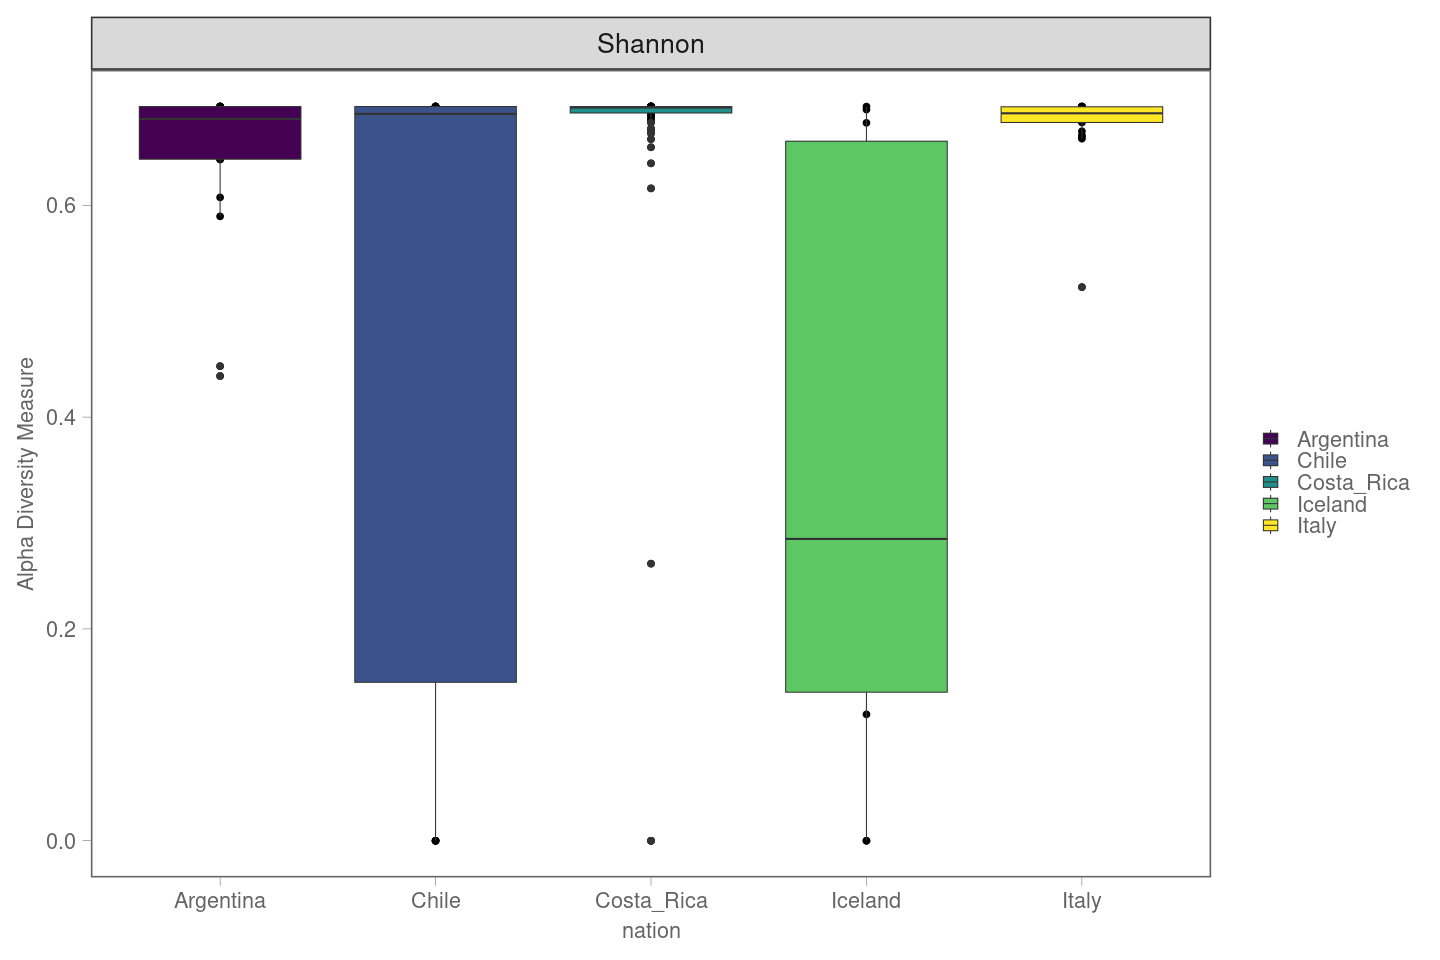

In [14]:
p.alph_div <- plot_richness(CAs, measures=c("shannon"), x="nation") + 

geom_boxplot(aes(fill=nation), lwd=0.3) +  

scale_fill_viridis(discrete=T) +

#scale_fill_manual(values = c("#B2182B", "#D6604D", "#F4A582", "#FDDBC7", "#D1E5F0"),
                  #labels=c("x","y","z")) +

#scale_x_discrete(name="",labels=c("x","y","z")) +

theme_glab() + theme(legend.title = element_blank())

p.alph_div

In [15]:
data.frame(sample_data(CAs))

,ID,expedition,nation,site_name,latitude,longitude,type,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG11,AG11,ARG19,Argentina,Pastos Grandes,-24.36459,-66.57113,S,44.90,8.74,-15.33,50.0,0.61,15.400,1288
AG13,AG13,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.85819,-66.99269,S,80.00,7.75,-14.81,10.0,0.19,NA,429
AG15,AG15,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.85824,-66.99282,S,80.00,3.21,-12.40,60.0,1.02,21.120,2050
AG17,AG17,ARG19,Argentina,Galán La Colcha,-26.03291,-66.98609,BG,84.00,6.94,-2.62,20.0,6.10,300.080,10618
AG19,AG19,ARG19,Argentina,Botijuela,-25.74303,-67.82325,S,40.00,6.44,NA,10.0,8.65,700.480,14643
AG1,AG1,ARG19,Argentina,Incachule,-24.28213,-66.46676,S,46.90,6.52,NA,10.0,1.54,NA,3000
AG22,AG22,ARG19,Argentina,Rosario de la Frontera,-25.40986,-64.59134,S,82.00,8.23,-8.28,0.0,1.57,151.800,3056
AG24,AG24,ARG19,Argentina,El Galpón,-24.40986,-64.59146,S,54.30,8.47,-10.67,0.0,1.81,94.662,3474
AG3,AG3,ARG19,Argentina,Pompeya,-24.24669,-66.36272,S,50.30,6.53,-5.33,10.0,5.09,930.309,9000


In [16]:
CAs_alpha <- data.frame(
                        estimate_richness(CAs, measures = c("Shannon")),
                        data.frame(sample_data(CAs)$temperature),
                        data.frame(sample_data(CAs)$pH),
                        data.frame(sample_data(CAs)$salinity),
                        data.frame(sample_data(CAs)$nation)
)
CAs_alpha

Warning message in estimate_richness(CAs, measures = c("Shannon")):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


,Shannon,sample_data.CAs..temperature,sample_data.CAs..pH,sample_data.CAs..salinity,sample_data.CAs..nation
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AG11,0.6694634,44.90,8.74,0.61,Argentina
AG13,0.5894789,80.00,7.75,0.19,Argentina
AG15,0.4480351,80.00,3.21,1.02,Argentina
AG17,0.6931472,84.00,6.94,6.10,Argentina
AG19,0.6628321,40.00,6.44,8.65,Argentina
AG1,0.6908179,46.90,6.52,1.54,Argentina
AG22,0.6931472,82.00,8.23,1.57,Argentina
AG24,0.4387352,54.30,8.47,1.81,Argentina
AG3,0.6831348,50.30,6.53,5.09,Argentina


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..rr.label..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(rr.label)` instead.”
Warning message:
“Removed 10 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


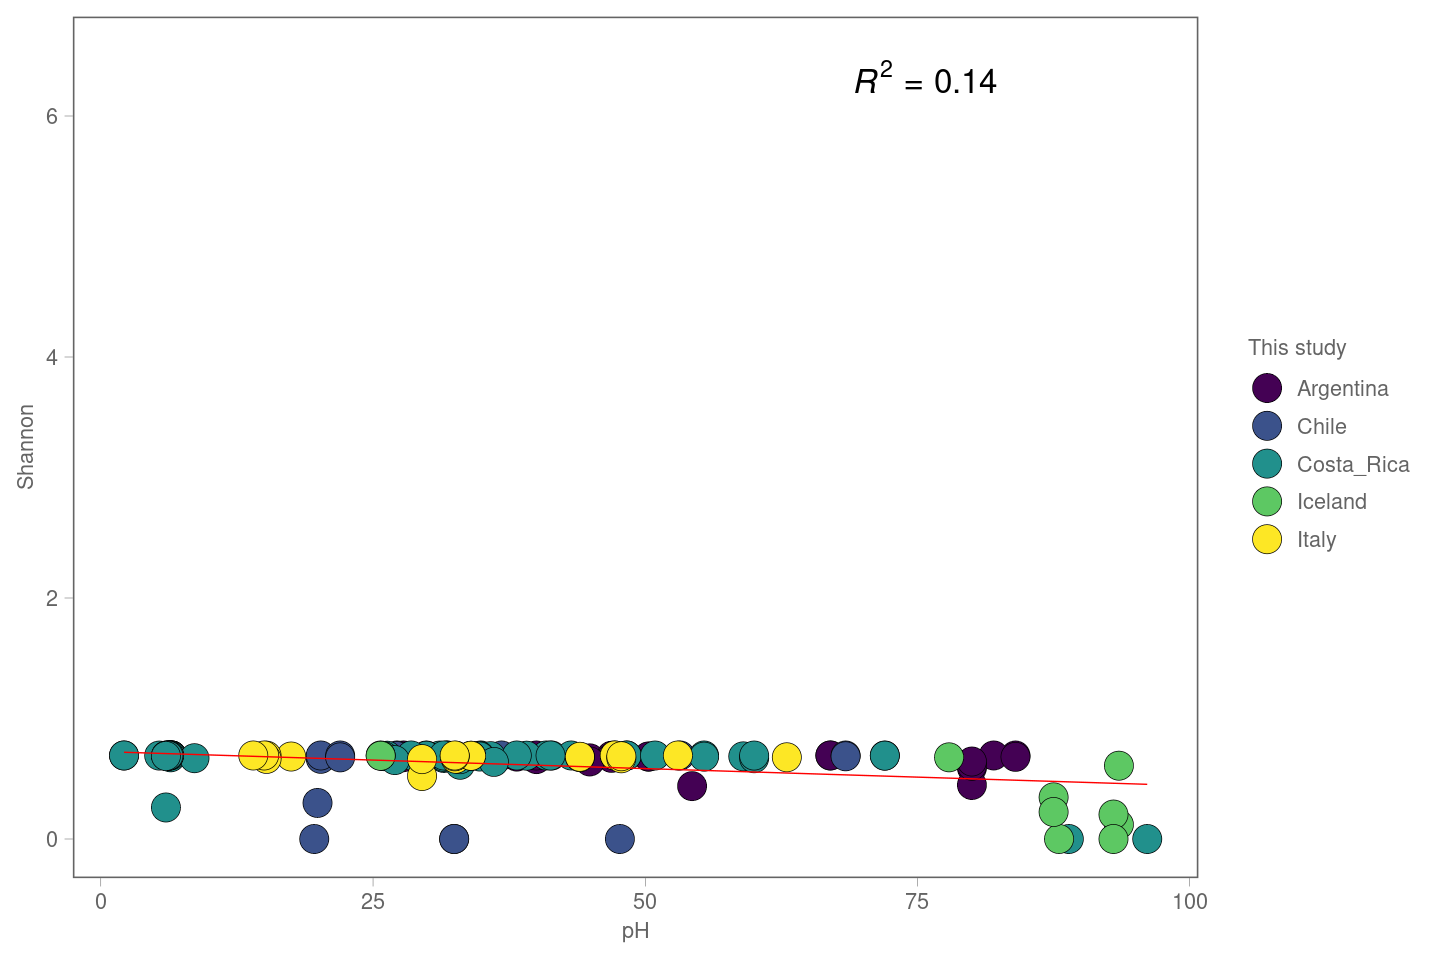

In [17]:
p.shan_temp <-ggplot(CAs_alpha,aes(x=sample_data.CAs..temperature,y=Shannon)) + 
geom_point(size=8,aes(fill=sample_data.CAs..nation),stroke=.3, shape=21)  +
scale_fill_viridis(discrete=TRUE) +
# scale_fill_manual(values=c("#440154","#3b528b","#2a788e","#fde725")) +
# geom_text(aes(label= sample_data.prok_ndata..code), size=5, hjust=-0.1, vjust=2.2) +
stat_poly_eq(formula = y ~ x, aes(label = paste(..rr.label.., sep = "~~")), parse = TRUE,hjust=-5,size=7) +
             geom_smooth(method=lm, formula= y~x,  se=FALSE,color="red",size=.4) +
xlab("pH") + 
guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
labs(fill="This study", shape="Sample type") + 
ylim(NA,6.5) +
theme_glab()

p.shan_temp

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


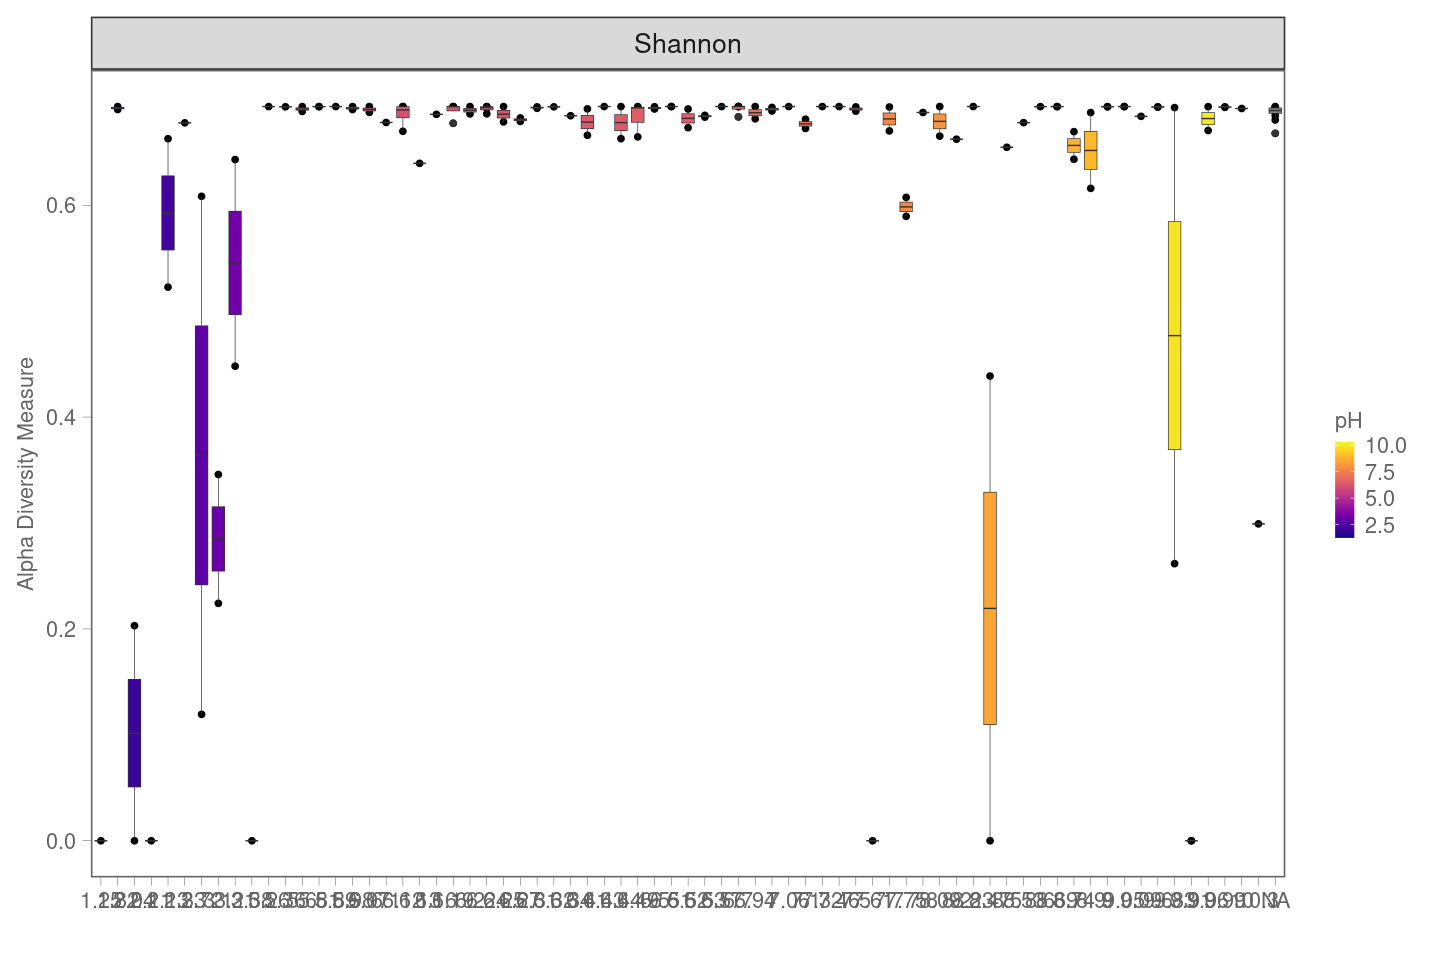

In [19]:
plot_richness(CAs, measures=c("shannon"), x="as.factor(pH)") + 
geom_boxplot(aes(fill=pH),lwd=0.2) +  

scale_fill_viridis(discrete=F,option="plasma") + 


labs(x="") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
                     axis.text=element_text(size=12,face="bold")) + theme_glab()

In [20]:
CAs_norm = transform_sample_counts(CAs, function(x){x / sum(x)})
CAs_norm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 14 sample variables ]
tax_table()   Taxonomy Table:    [ 2 taxa by 2 taxonomic ranks ]

## Barplots

In [21]:
CAs_hmm = tax_glom(CAs_norm, "hmm", NArm = FALSE)
CAs_hmm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 14 sample variables ]
tax_table()   Taxonomy Table:    [ 2 taxa by 2 taxonomic ranks ]

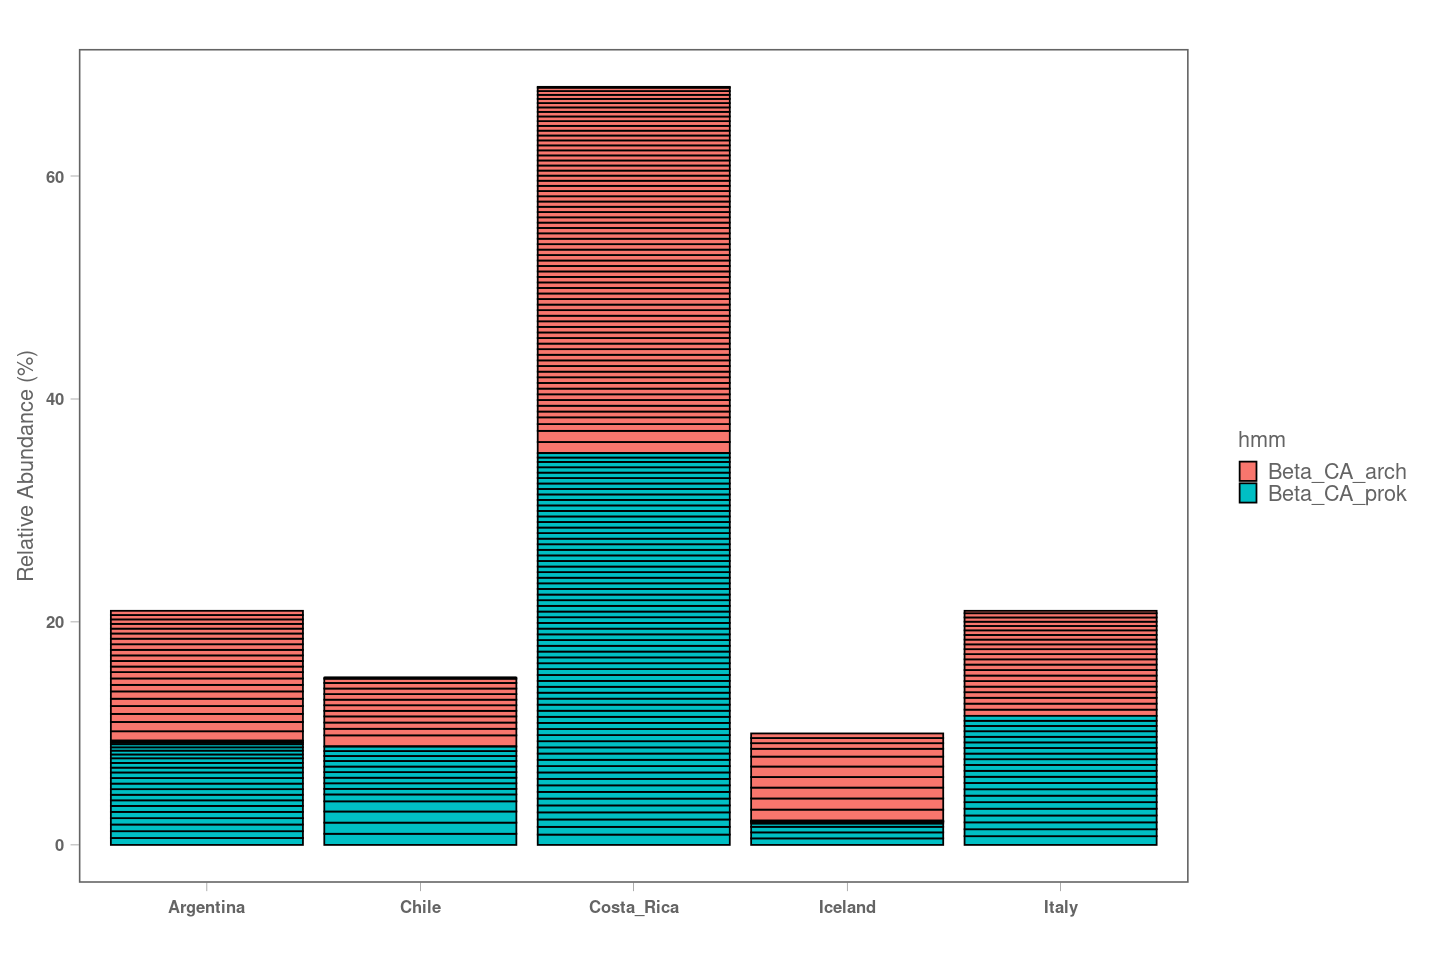

In [22]:
phyl_bio <- plot_bar(subset_samples(CAs_hmm), fill="hmm", x="nation", title = "") +  

#gghighlight(phyl_bio$data$Abundance > 0.009, use_group_by = FALSE) +

labs(x="",
     y="Relative Abundance (%)") +

theme_glab() + theme(legend.position = "right")+
theme(axis.text.x = element_text(angle = 0, vjust = 0.25, hjust=0.5),
      axis.text=element_text(size=10,face="bold")) 

phyl_bio

## Beta-Diversity analysis

## NMDS Jaccard similarity index: Weighted and Unweighted

## Weighted PCoA Jaccard

In [25]:
CAs_wjak <- phyloseq::distance(CAs, method = "jaccard")
CAs_jw <- ordinate(CAs,CAs_wjak, method = "PCoA")
evals_jw <- CAs_jw$values$Eigenvalues

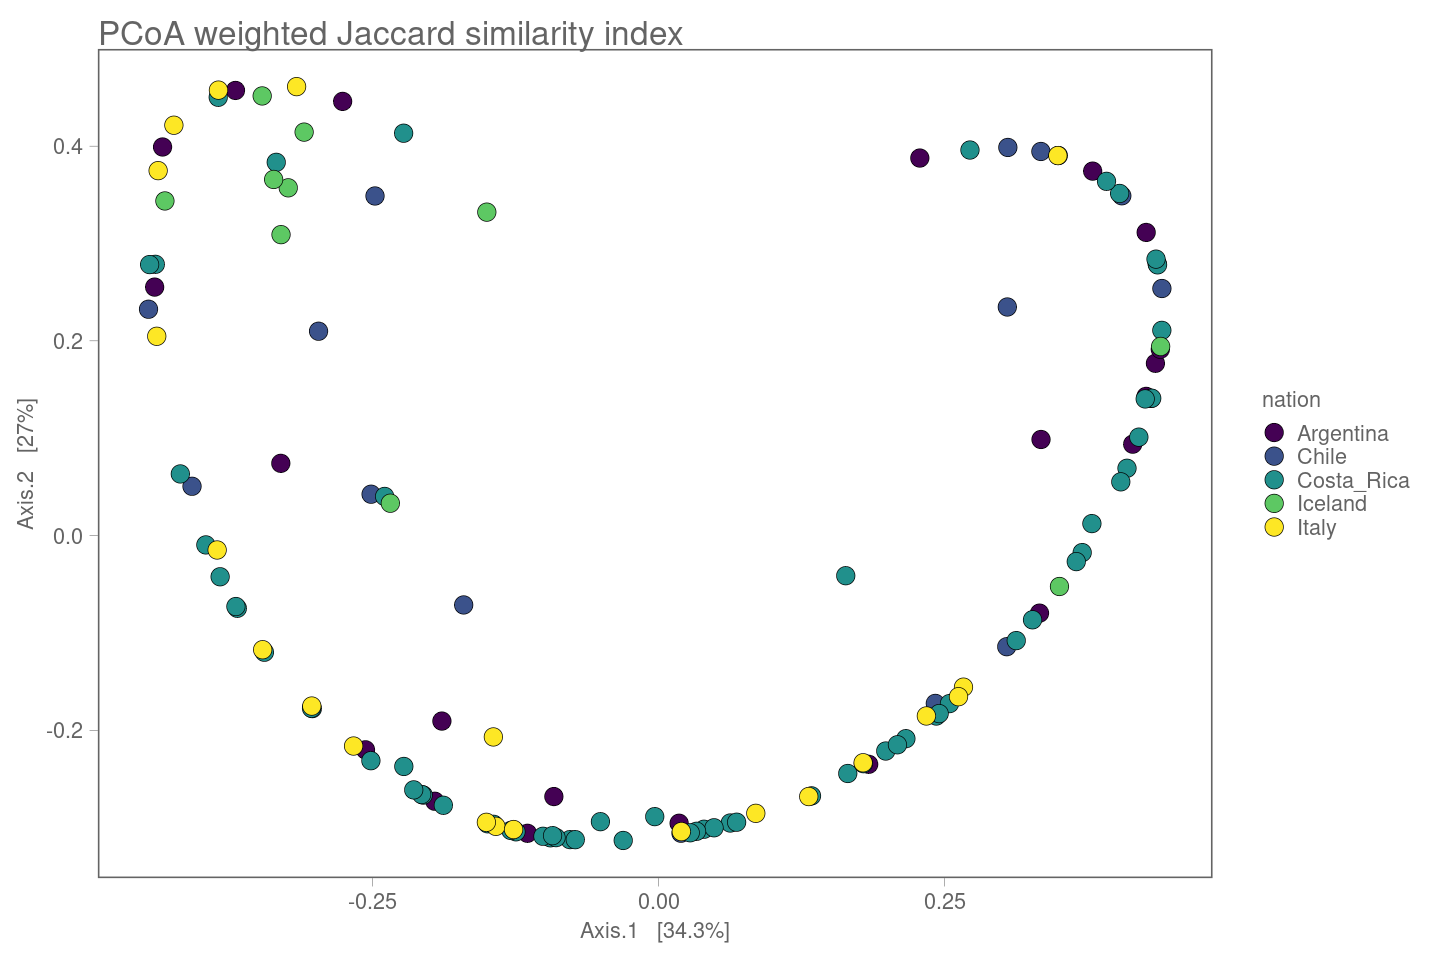

In [26]:
p1 <- plot_ordination(CAs, CAs_jw, type="sample", title="PCoA weighted Jaccard similarity index") +
#coord_fixed(sqrt(evals_jw[2] / evals_jw[1]))  + 
geom_point(aes(fill=nation), size=5, shape=21, stroke=0.3) + 
#geom_text(aes(label= sample), size=4, hjust=0.2,vjust=2) + 
scale_fill_viridis(discrete=T) +
scale_shape_manual(values=c(21:23)) +
theme_glab() + theme(legend.position = "right")+ 
guides(fill = guide_legend(override.aes = list(shape = 21))) 
p1

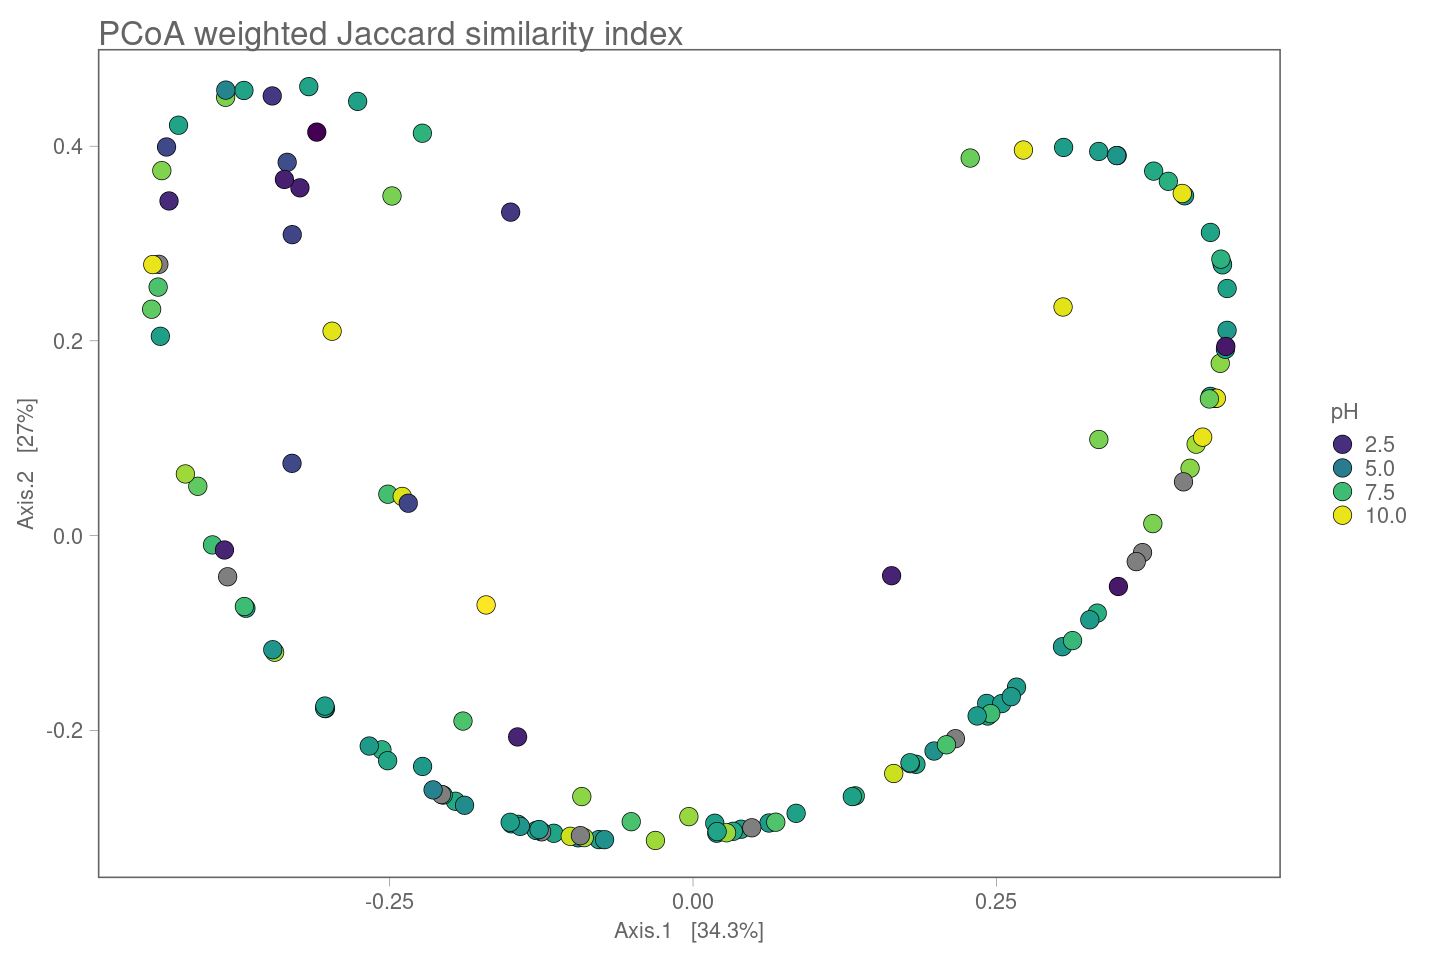

In [27]:
p1 <- plot_ordination(CAs, CAs_jw, type="sample", title="PCoA weighted Jaccard similarity index") +
#coord_fixed(sqrt(evals_jw[2] / evals_jw[1]))  + 
geom_point(aes(fill=pH), size=5, shape=21, stroke=0.3) + 
#geom_text(aes(label= sample), size=4, hjust=0.2,vjust=2) + 
scale_fill_viridis(discrete=F) +
scale_shape_manual(values=c(21:23)) +
theme_glab() + theme(legend.position = "right")+ 
guides(fill = guide_legend(override.aes = list(shape = 21))) 
p1

## nMDS weighted Jaccard

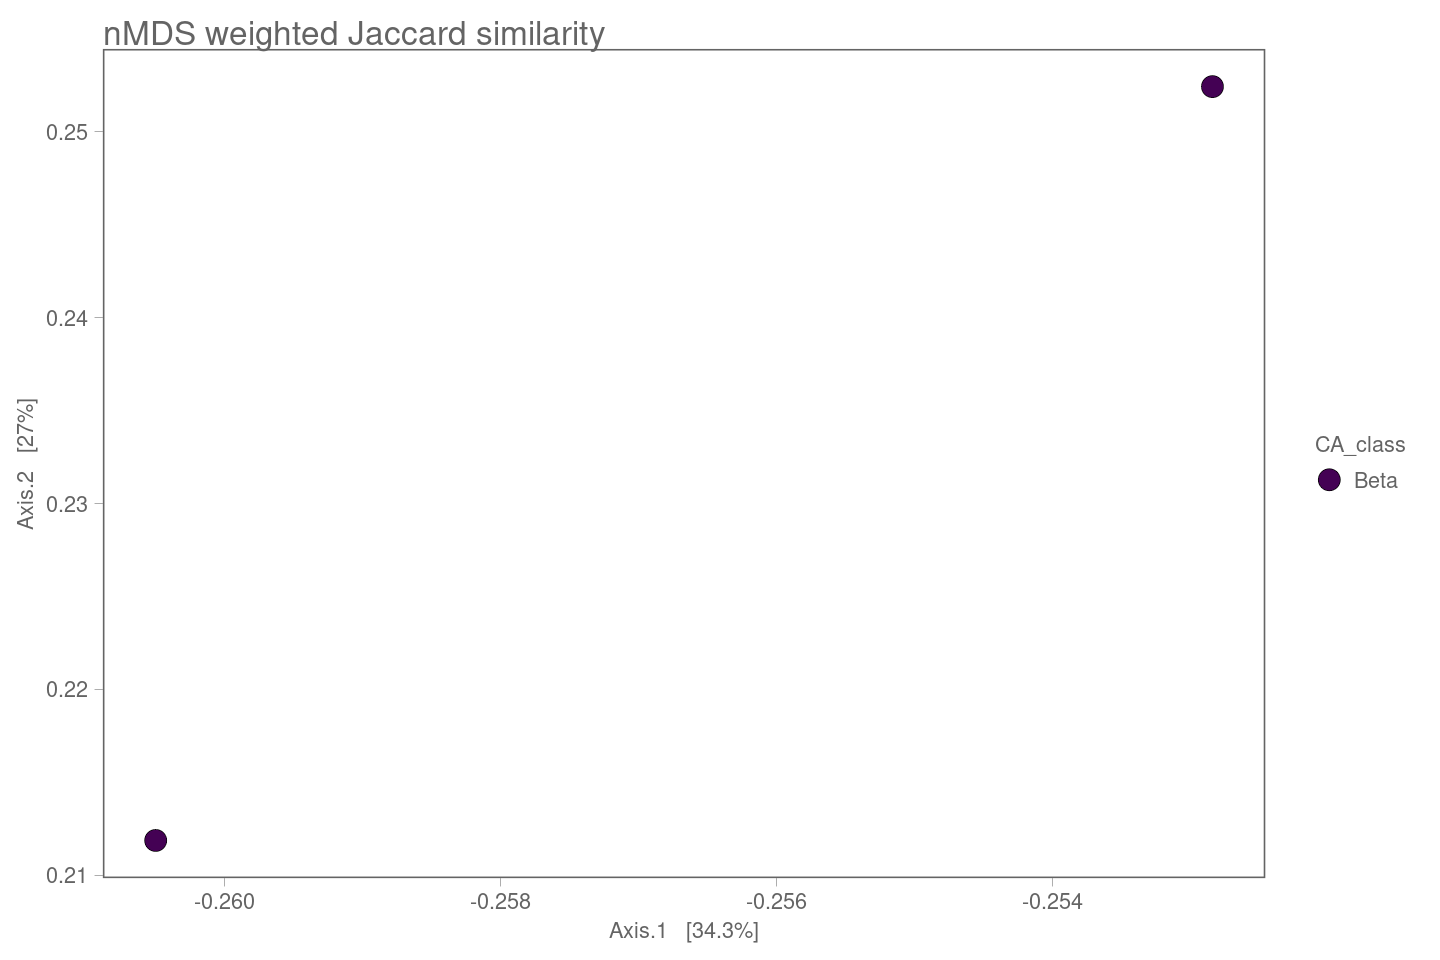

In [28]:
plot_ordination(CAs, CAs_jw, type="taxa",title="nMDS weighted Jaccard similarity") +

    geom_point(aes(fill=CA_class),shape=21, size=6,color="black",stroke=0.3) + 

    #geom_text(aes(label= nation), size=4, hjust=0.2,vjust=2) +

    scale_fill_viridis(discrete=T) + 

    scale_shape_manual(values=c(21:24)) +

    theme_glab() + theme(legend.position = "right") +

    guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black")))

## nMDS unweighted jaccard

In [29]:
CAs_wjac <- phyloseq::distance(CAs, method = "jaccard")
CAs_unjac <- phyloseq::distance(CAs, method = "jaccard", binary = TRUE)

In [30]:
CAs_juw <- ordinate(CAs, CAs_unjac, method = "NMDS",trymax=100)

Run 0 stress 1.850353e-16 
Run 1 stress 0 
... New best solution
... Procrustes: rmse 0.07200242  max resid 0.2734001 
Run 2 stress 0.0355987 
Run 3 stress 0 
... Procrustes: rmse 0.07345101  max resid 0.1798922 
Run 4 stress 0.03584138 
Run 5 stress 0.04519691 
Run 6 stress 0.02164172 
Run 7 stress 0 
... Procrustes: rmse 0.0760322  max resid 0.1794033 
Run 8 stress 0 
... Procrustes: rmse 0.0777274  max resid 0.2034016 
Run 9 stress 0 
... Procrustes: rmse 0.07371198  max resid 0.1679611 
Run 10 stress 0 
... Procrustes: rmse 0.07554431  max resid 0.1466815 
Run 11 stress 0.04834506 
Run 12 stress 0 
... Procrustes: rmse 0.07802791  max resid 0.2007674 
Run 13 stress 0 
... Procrustes: rmse 0.07707511  max resid 0.1669708 
Run 14 stress 0.0389301 
Run 15 stress 0.04642655 
Run 16 stress 0 
... Procrustes: rmse 0.07471781  max resid 0.1285981 
Run 17 stress 0 
... Procrustes: rmse 0.08004818  max resid 0.1971035 
Run 18 stress 0 
... Procrustes: rmse 0.0780835  max resid 0.1830258 
Ru

Warning message in metaMDS(ps.dist):
“stress is (nearly) zero: you may have insufficient data”


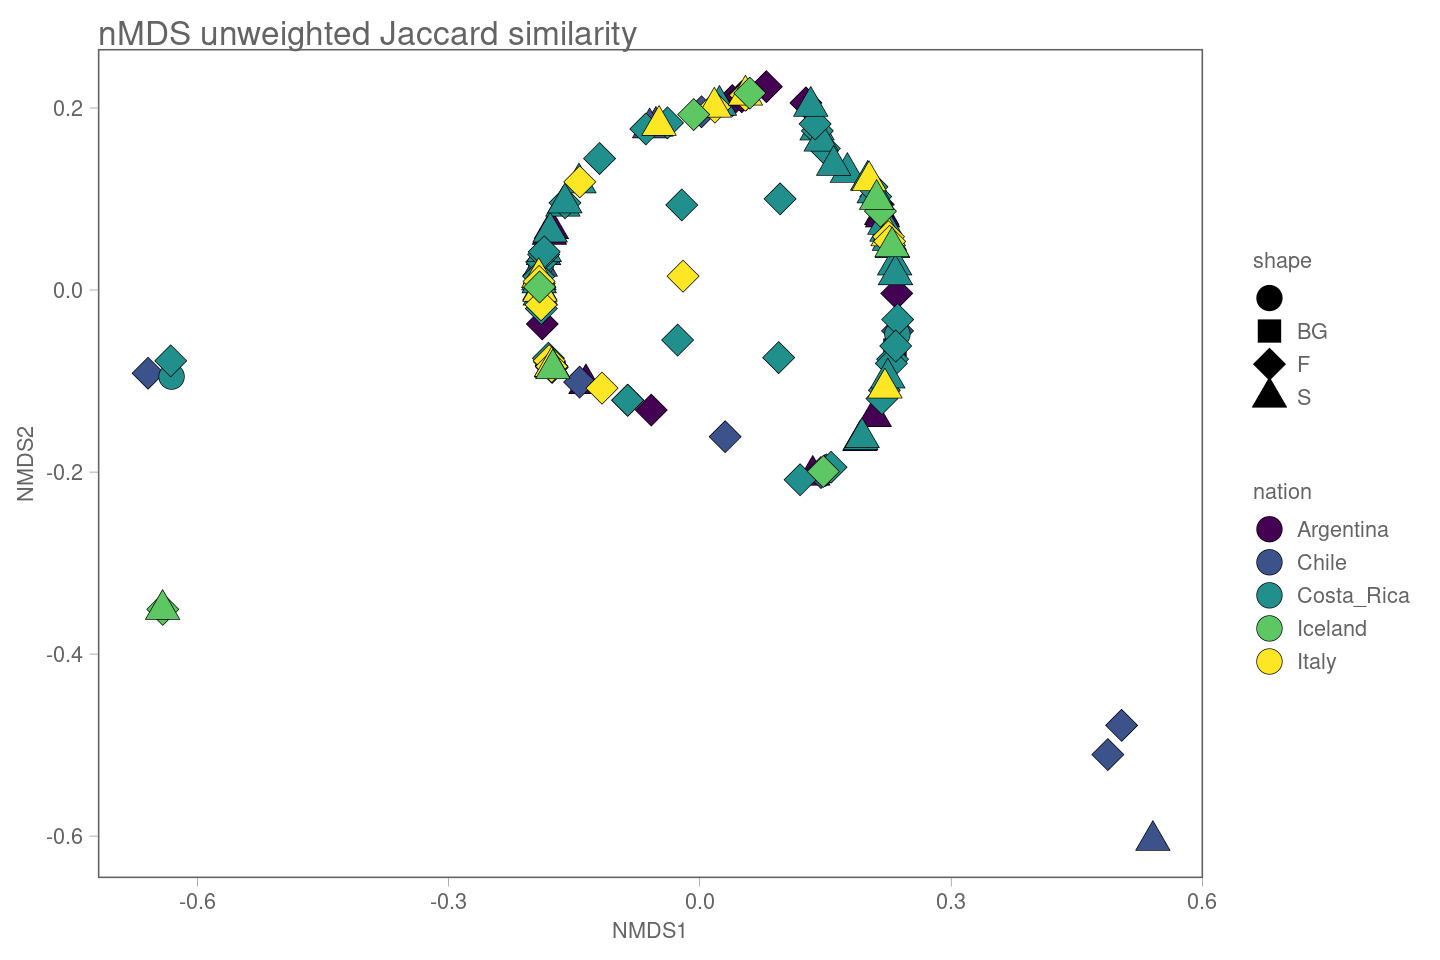

In [31]:
plot_ordination(CAs, CAs_juw, type="samples",title="nMDS unweighted Jaccard similarity") +

        geom_point(aes(fill=nation,shape=type),size=7,color="black",stroke=0.3) + 

        #geom_text(aes(label= nation), size=4, hjust=0.4,vjust=2) + 

        scale_fill_viridis(discrete=TRUE) + scale_shape_manual(values=c(21:24)) +

        theme_glab() + theme(legend.position = "right") +

        guides(fill = guide_legend(override.aes = list(shape = 21) ),
              shape = guide_legend(override.aes = list(fill = "black")))

In [32]:
CAs_jw <- ordinate(CAs,CAs_wjac, method = "NMDS",trymax=100)

Run 0 stress 0.08599444 
Run 1 stress 0.06229637 
... New best solution
... Procrustes: rmse 0.03960517  max resid 0.210369 
Run 2 stress 0.07709287 
Run 3 stress 0.08316022 
Run 4 stress 0.06876922 
Run 5 stress 0.06229713 
... Procrustes: rmse 0.0001808592  max resid 0.00104999 
... Similar to previous best
Run 6 stress 0.0677671 
Run 7 stress 0.0761962 
Run 8 stress 0.0622971 
... Procrustes: rmse 0.0001771292  max resid 0.001050433 
... Similar to previous best
Run 9 stress 0.08359242 
Run 10 stress 0.06776661 
Run 11 stress 0.07916946 
Run 12 stress 0.06822202 
Run 13 stress 0.08889318 
Run 14 stress 0.06461667 
Run 15 stress 0.08979558 
Run 16 stress 0.06229703 
... Procrustes: rmse 0.0001637498  max resid 0.001092585 
... Similar to previous best
Run 17 stress 0.08444869 
Run 18 stress 0.08265474 
Run 19 stress 0.09082034 
Run 20 stress 0.08891813 
*** Best solution repeated 3 times


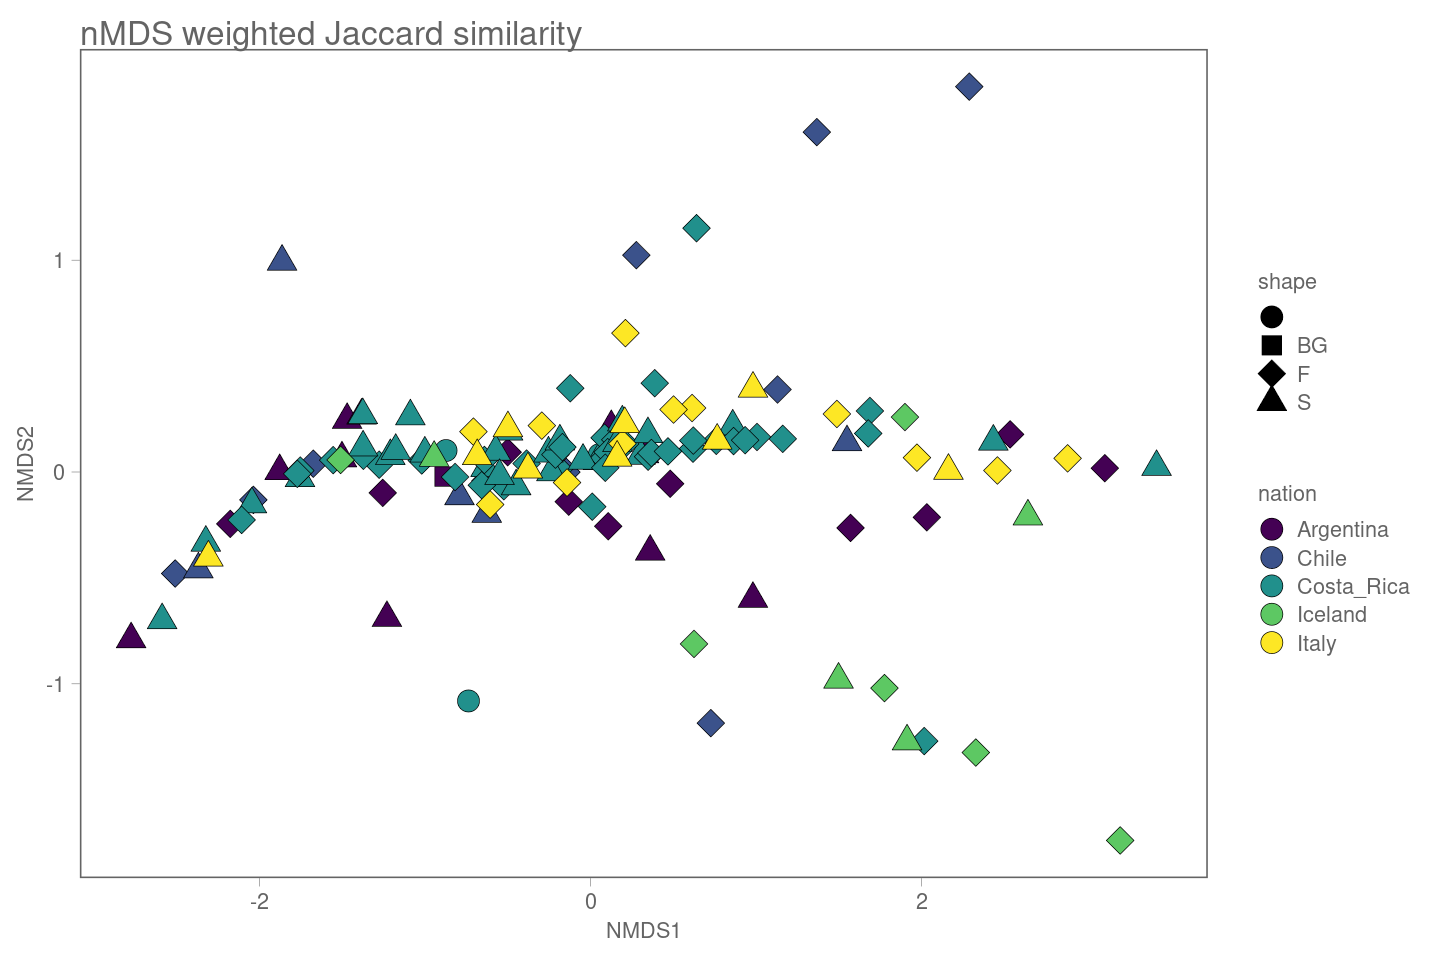

In [33]:
plot_ordination(CAs, CAs_jw, type="samples",title="nMDS weighted Jaccard similarity") +

    geom_point(aes(fill=nation, shape=type),size=6,color="black",stroke=0.3) + 

    #geom_text(aes(label= nation), size=4, hjust=0.2,vjust=2) +

    scale_fill_viridis(discrete=T) + 

    scale_shape_manual(values=c(21:24)) +

    theme_glab() + theme(legend.position = "right") +

    guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black")))

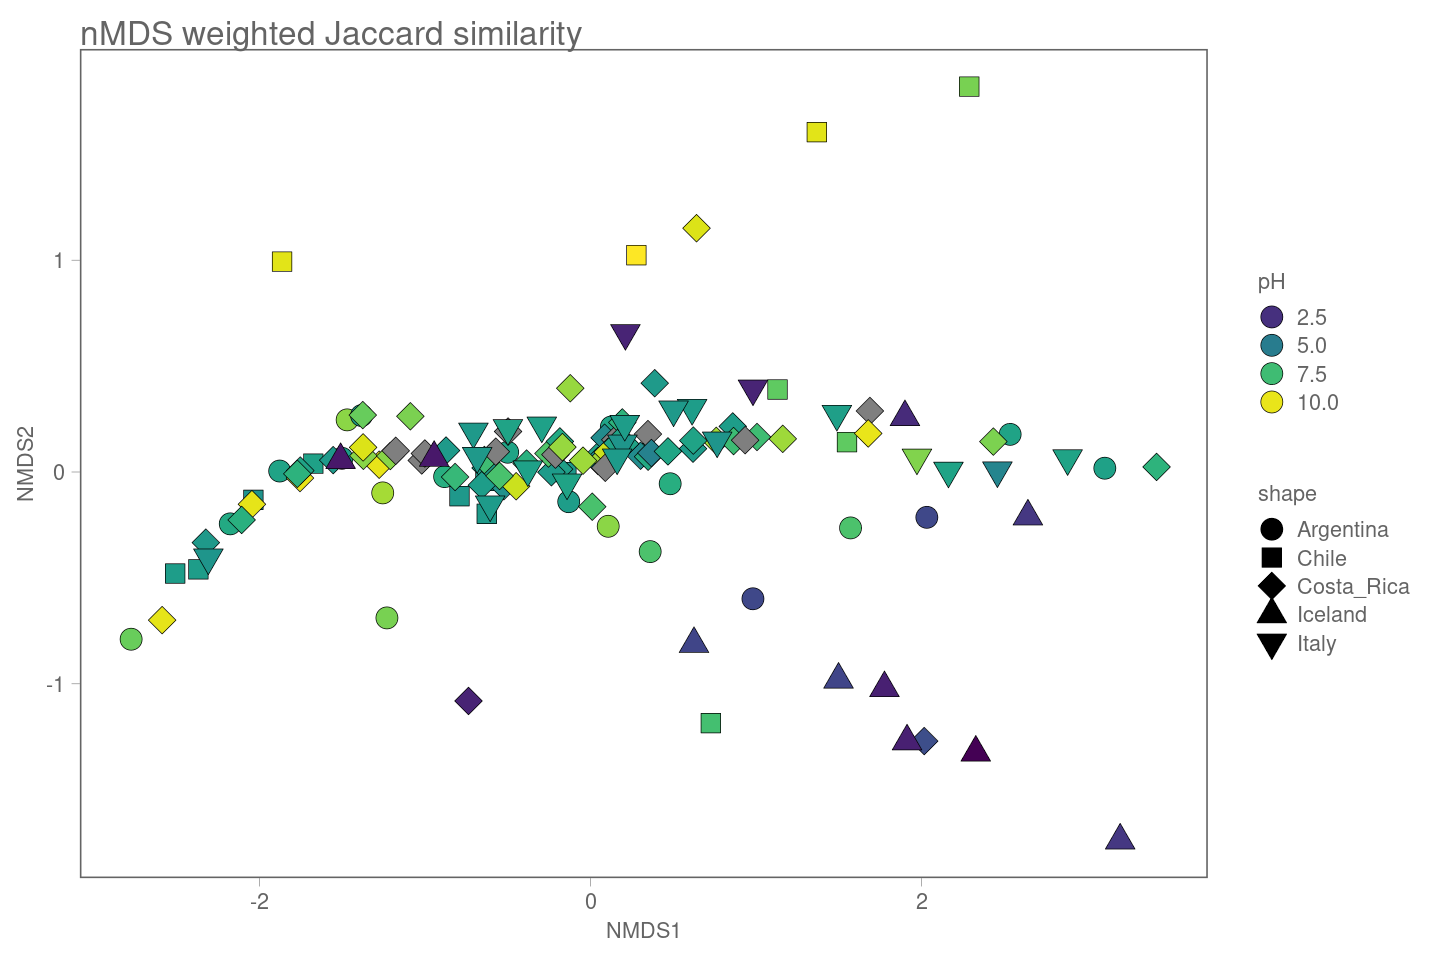

In [34]:
plot_ordination(CAs, CAs_jw, type="samples",title="nMDS weighted Jaccard similarity") +

    geom_point(aes(fill=pH,shape=nation),size=6,color="black",stroke=0.3) + 

    #geom_text(aes(label= nation), size=4, hjust=0.2,vjust=2) +

    scale_fill_viridis(discrete=F) + 

    scale_shape_manual(values=c(21:25)) +

    theme_glab() + theme(legend.position = "right") +

    guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black")))

## Vector Fitting Weighted Jaccard

In [39]:
nmds_df1_jw<-cbind(sample_data(CAs),CAs_jw$points)
nmds_df1_jw

,ID,expedition,nation,site_name,latitude,longitude,type,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc,MDS1,MDS2
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG11,AG11,ARG19,Argentina,Pastos Grandes,-24.36459,-66.57113,S,44.90,8.74,-15.33,50.0,0.61,15.400,1288,-1.4712514,0.245974677
AG13,AG13,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.85819,-66.99269,S,80.00,7.75,-14.81,10.0,0.19,NA,429,0.3598901,-0.375938619
AG15,AG15,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.85824,-66.99282,S,80.00,3.21,-12.40,60.0,1.02,21.120,2050,0.9808542,-0.598501557
AG17,AG17,ARG19,Argentina,Galán La Colcha,-26.03291,-66.98609,BG,84.00,6.94,-2.62,20.0,6.10,300.080,10618,-0.8821768,-0.021909225
AG19,AG19,ARG19,Argentina,Botijuela,-25.74303,-67.82325,S,40.00,6.44,NA,10.0,8.65,700.480,14643,-1.3840413,0.266454391
AG1,AG1,ARG19,Argentina,Incachule,-24.28213,-66.46676,S,46.90,6.52,NA,10.0,1.54,NA,3000,-1.8788814,0.004490141
AG22,AG22,ARG19,Argentina,Rosario de la Frontera,-25.40986,-64.59134,S,82.00,8.23,-8.28,0.0,1.57,151.800,3056,-2.7765479,-0.789354531
AG24,AG24,ARG19,Argentina,El Galpón,-24.40986,-64.59146,S,54.30,8.47,-10.67,0.0,1.81,94.662,3474,-1.2308132,-0.688820802
AG3,AG3,ARG19,Argentina,Pompeya,-24.24669,-66.36272,S,50.30,6.53,-5.33,10.0,5.09,930.309,9000,0.1250043,0.212334329


In [56]:
nmds_df1.1_jw <- nmds_df1_jw[,5:16]

nmds_df1.1_jw <- nmds_df1.1_jw[ -c(3) ]

nmds_df1.1_jw


,latitude,longitude,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc,MDS1,MDS2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG11,-24.36459,-66.57113,44.90,8.74,-15.33,50.0,0.61,15.400,1288,-1.4712514,0.245974677
AG13,-25.85819,-66.99269,80.00,7.75,-14.81,10.0,0.19,NA,429,0.3598901,-0.375938619
AG15,-25.85824,-66.99282,80.00,3.21,-12.40,60.0,1.02,21.120,2050,0.9808542,-0.598501557
AG17,-26.03291,-66.98609,84.00,6.94,-2.62,20.0,6.10,300.080,10618,-0.8821768,-0.021909225
AG19,-25.74303,-67.82325,40.00,6.44,NA,10.0,8.65,700.480,14643,-1.3840413,0.266454391
AG1,-24.28213,-66.46676,46.90,6.52,NA,10.0,1.54,NA,3000,-1.8788814,0.004490141
AG22,-25.40986,-64.59134,82.00,8.23,-8.28,0.0,1.57,151.800,3056,-2.7765479,-0.789354531
AG24,-24.40986,-64.59146,54.30,8.47,-10.67,0.0,1.81,94.662,3474,-1.2308132,-0.688820802
AG3,-24.24669,-66.36272,50.30,6.53,-5.33,10.0,5.09,930.309,9000,0.1250043,0.212334329


In [54]:
message("Test with Pearson correlation vs NMDS1:")
# Pearson
for (i in 1:length(nmds_df1.1_jw)) {
    a <- cor.test(nmds_df1.1_jw[,i], nmds_df1.1_jw$MDS1)
       if (a$p.value<0.05) {
           print(paste(i,colnames(nmds_df1.1_jw)[i],a$estimate, a$parameter, a$p.value))
       }
}

message("Test with Pearson correlation vs NMDS2:")
# Pearson
for (i in 1:length(nmds_df1.1_jw)) {
    a <- cor.test(nmds_df1.1_jw[,i], nmds_df1.1_jw$MDS2)
       if (a$p.value<0.01) {
           print(paste(i,colnames(nmds_df1.1_jw)[i],a$estimate, a$parameter, a$p.value))
       }
}

Test with Pearson correlation vs NMDS1:



[1] "1 latitude 0.267982187229217 133 0.00167568580554893"
[1] "2 longitude 0.24665806490631 133 0.00392714117672284"
[1] "3 temperature 0.26517094863797 123 0.00280249869504314"
[1] "4 pH -0.2671661270315 122 0.00270308907176479"
[1] "10 MDS1 1 133 0"


Test with Pearson correlation vs NMDS2:



[1] "3 temperature -0.46558694414104 123 4.47187108483376e-08"
[1] "4 pH 0.44324279296224 122 2.53065270952329e-07"
[1] "6 dissolved_oxygen -0.267872586420909 98 0.0070499021627855"
[1] "11 MDS2 1 133 0"


In [57]:
env_jw <-envfit(nmds_df1.1_jw[,c(10:11)], nmds_df1.1_jw[,c(1:9)], perm = 9999, na.rm = T)
env_jw


***VECTORS

                     MDS1     MDS2     r2 Pr(>r)  
latitude         -0.05137  0.99868 0.0982 0.4213  
longitude        -0.05524  0.99847 0.0892 0.4578  
temperature       0.18968 -0.98185 0.3008 0.0455 *
pH               -0.70370  0.71050 0.2547 0.0814 .
C13              -0.12636  0.99198 0.1817 0.1830  
dissolved_oxygen  0.36016  0.93289 0.0312 0.7645  
salinity         -0.12941  0.99159 0.1453 0.2533  
alkalinity       -0.04430  0.99902 0.2613 0.0782 .
spc              -0.16382  0.98649 0.0982 0.4174  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 9999

115 observations deleted due to missingness

In [58]:
env.scores_jw <- as.data.frame(scores(env_jw, display = "vectors"))         #extracts relevant scores from envifit
env.scores_jw <- cbind(env.scores_jw, env.variables = rownames(env.scores_jw)) #and then gives them their names

env.scores_jw <- cbind(env.scores_jw, pval = env_jw$vectors$pvals) # add pvalues to dataframe
sig.env.scrs_jw <- subset(env.scores_jw, pval<=0.09) #subset data to show variables significant at 0.05

sig.env.scrs_jw

,MDS1,MDS2,env.variables,pval
,<dbl>,<dbl>,<chr>,<dbl>
temperature,0.10403847,-0.5385321,temperature,0.0455
pH,-0.35515042,0.3585791,pH,0.0814
alkalinity,-0.02264601,0.5106526,alkalinity,0.0782


In [59]:
en_coord_cont.1_jw = sig.env.scrs_jw[,1:2] * ordiArrowMul(env_jw)
en_coord_cont.1_jw

,MDS1,MDS2
,<dbl>,<dbl>
temperature,0.1528022,-0.7909470
pH,-0.5216126,0.5266483
alkalinity,-0.0332604,0.7500000


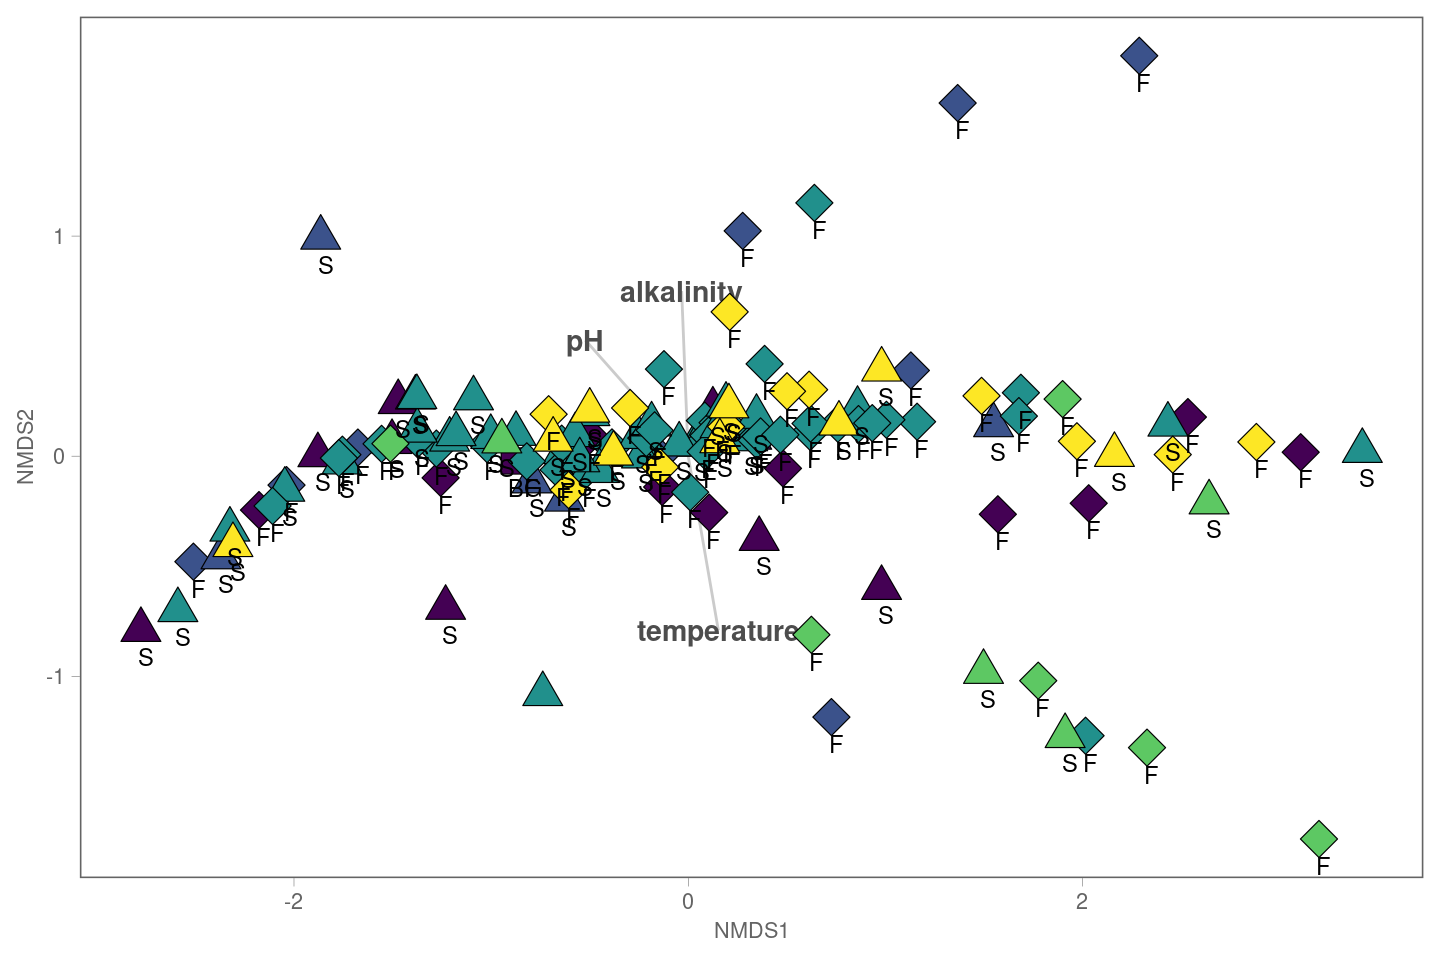

In [60]:
nmds_jw_envfit <- ggplot(data = nmds_df1_jw, aes(x = MDS1, y = MDS2)) + 
     
        geom_segment(data = en_coord_cont.1_jw, aes(x = 0, y = 0, xend = MDS1, yend = MDS2), 
                            size =.8, alpha = 0.8, colour = "grey") + 
     
        geom_text(data = en_coord_cont.1_jw, aes(x = MDS1, y = MDS2), colour = "grey30", 
                         fontface = "bold", size=6, label = row.names(en_coord_cont.1_jw)) + 
     
        geom_point(aes(fill = nation ,shape = type), size = 8) +
    
        scale_fill_viridis(discrete=TRUE) +
     
        scale_shape_manual(values = c(24,22,23,24,25)) + 
     
        geom_text(aes(label = type), size=5, hjust=0.2, vjust=2) +
     
        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        xlab("NMDS1") + ylab("NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
        theme_glab() + 

        theme(legend.position = "none")

nmds_jw_envfit